<h1>Customer Clustering Notebook</h1>

<h1>1. Dataset Introduction</h1>
<h3>This dataset is titled Shop Customer Data, and it is taken from Kaggle. It provides a detailed analysis of the ideal customers of a store. This dataset helps businesses better understand their customers. Store owners obtain customer information through membership cards. <br><br>
The dataset consists of 2,000 records and 8 columns, which are:<br>

* Customer ID: A unique ID for each customer.

* Gender: The gender of the customer.

* Age: The age of the customer.

* Annual Income: The annual income of the customer.

* Spending Score: A score given by the store based on the customer's shopping behavior and habits.

* Profession: The profession of the customer.

* Work Experience: The number of years of work experience the customer has.

* Family Size: The family size of the customer.

</h3>



<h1>2. Importing Libraries</h1>



In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

<h1>3. Exploratory Data Analysis (EDA)</h1>

In [85]:
df = pd.read_csv("Customers.csv")
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


**int64: Customer ID, Age, Annual Income, Spending Score, Work Experience, and Family Size.<br>
object: Gender and Profession.**

In [87]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


<h2>Visualizing Objects Data

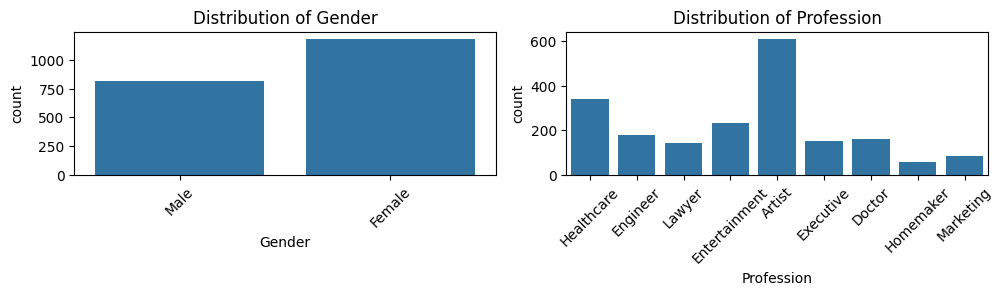

In [88]:
categorical_columns = df.select_dtypes(include= ['object']).columns.tolist()

plt.figure(figsize=(15,10))

for i, col in enumerate(categorical_columns, 1):
  plt.subplot(4,3,i)
  sns.countplot(data= df, x= col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()

plt.show()

<h2>Statistical Analysis

In [89]:
print(df.describe())

        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

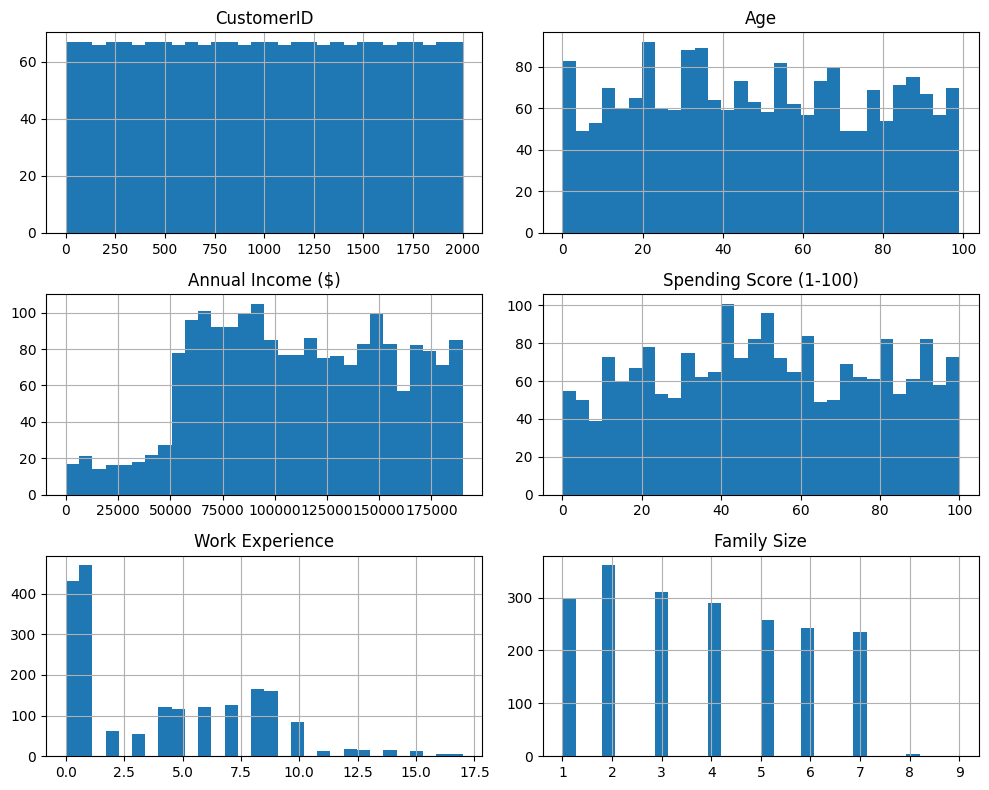

In [90]:
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

<h2>Data Preprocessing

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


* Null Values

In [92]:
print("number of Nan in dataset : ")
print(df.isnull().sum().sort_values(ascending=False))

number of Nan in dataset : 
Profession                35
CustomerID                 0
Age                        0
Gender                     0
Annual Income ($)          0
Spending Score (1-100)     0
Work Experience            0
Family Size                0
dtype: int64


In [93]:
df.dropna(inplace= True) # drop null rows

In [94]:
print("number of Nan in dataset : ")
print(df.isnull().sum().sort_values(ascending=False))

number of Nan in dataset : 
CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64


* Duplicated Values

In [95]:
print("number of duplicated rows : ")
print(df.duplicated().sum())

number of duplicated rows : 
0


* Outliers Values

In [96]:
# select numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# outlier : [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("number of outliers in dataset : ")
print(outliers)

number of outliers in dataset : 
CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Work Experience           5
Family Size               0
dtype: int64


In [97]:
Q1 = df['Work Experience'].quantile(0.25)
Q3 = df['Work Experience'].quantile(0.75)
IQR = Q3 - Q1

# outlier rows
df[(df['Work Experience'] > (Q3 + 1.5 * IQR)) | (df['Work Experience'] < (Q1 - 1.5 * IQR))]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
392,393,Male,21,119116,30,Artist,17,4
405,406,Female,65,119889,11,Artist,17,6
473,474,Male,20,130813,92,Artist,17,5
566,567,Female,19,180331,14,Artist,17,5
603,604,Female,91,69720,78,Lawyer,17,6


In [98]:
df_without_outliers = df[(df['Work Experience'] <= (Q3 + 1.5 * IQR)) | (df['Work Experience'] >= (Q1 - 1.5 * IQR))]
df_without_outliers

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


<h2>Encoding Categorical Data

In [99]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [100]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6
...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7
1996,1997,0,91,73158,32,1,7,7
1997,1998,1,87,90961,14,5,9,2
1998,1999,1,77,182109,4,4,7,2


In [101]:
for column in categorical_columns:
    print(f"Label Encoder for {column}:")
    for index, class_ in enumerate(label_encoders[column].classes_):
        print(f"{index}: {class_}")
    print()

Label Encoder for Gender:
0: Female
1: Male

Label Encoder for Profession:
0: Artist
1: Doctor
2: Engineer
3: Entertainment
4: Executive
5: Healthcare
6: Homemaker
7: Lawyer
8: Marketing



<h1>4. K-means Clustering</h1>

<h3> At first assume  'X' -> 'Annual Income ($)' and 'Spending Score (1-100)'

In [102]:
X = df.loc[:,['Annual Income ($)', 'Spending Score (1-100)']].values
X

array([[ 15000,     39],
       [ 35000,     81],
       [ 86000,      6],
       ...,
       [ 90961,     14],
       [182109,      4],
       [110610,     52]])

<h3> We will use Elbow Method and Silhouette Score to choose the optimal number (k)

In [103]:
wcss = []
silhouette_scores = []

for i in range(2,11):
  kmean = KMeans(n_clusters= i, init= "k-means++", random_state= 42)
  kmean.fit(X)
  wcss.append(kmean.inertia_)
  silhouette_scores.append(silhouette_score(X, kmean.labels_))

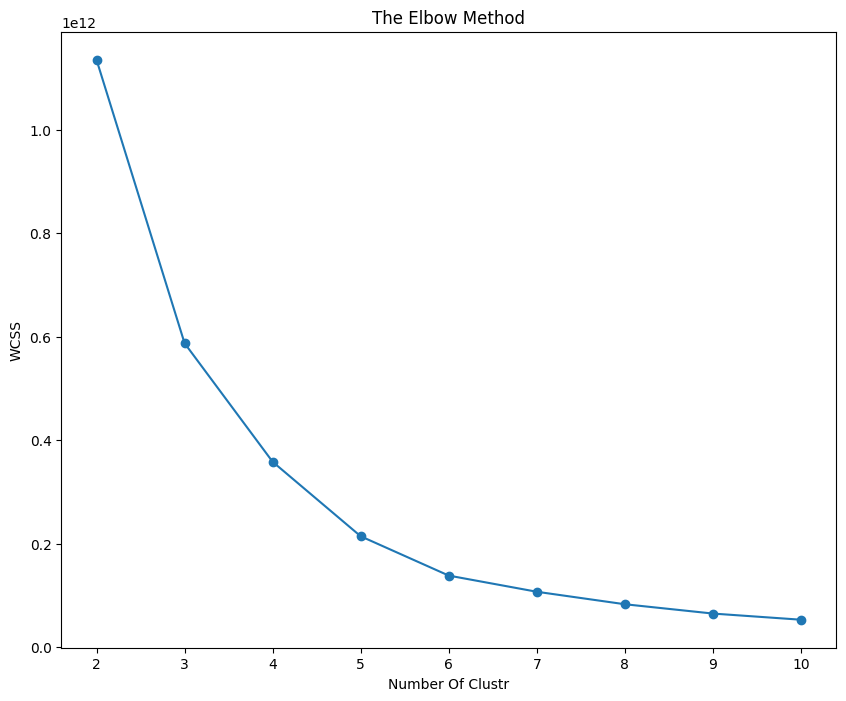

******************************
******************************
Number Of Clusters: 2, Silhouette Score: 0.62
Number Of Clusters: 3, Silhouette Score: 0.56
Number Of Clusters: 4, Silhouette Score: 0.53
Number Of Clusters: 5, Silhouette Score: 0.56
Number Of Clusters: 6, Silhouette Score: 0.57
Number Of Clusters: 7, Silhouette Score: 0.55
Number Of Clusters: 8, Silhouette Score: 0.55
Number Of Clusters: 9, Silhouette Score: 0.55
Number Of Clusters: 10, Silhouette Score: 0.55
******************************
******************************


In [104]:
plt.figure(figsize=(10, 8))
plt.plot(range(2,11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number Of Clustr")
plt.ylabel("WCSS")
plt.show()

print('*' * 30)
print('*' * 30)


for k in range(len(silhouette_scores)):
  print(f"Number Of Clusters: {k+2}, Silhouette Score: {silhouette_scores[k]:.2f}")

print('*' * 30)
print('*' * 30)

In [105]:
best_cluster = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Best number of clusters is {best_cluster} , Silhouette Score: {max(silhouette_scores):.2f}")

Best number of clusters is 2 , Silhouette Score: 0.62


<h3>When K = 2 :




In [106]:
kmeans = KMeans(n_clusters= 2, init= 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

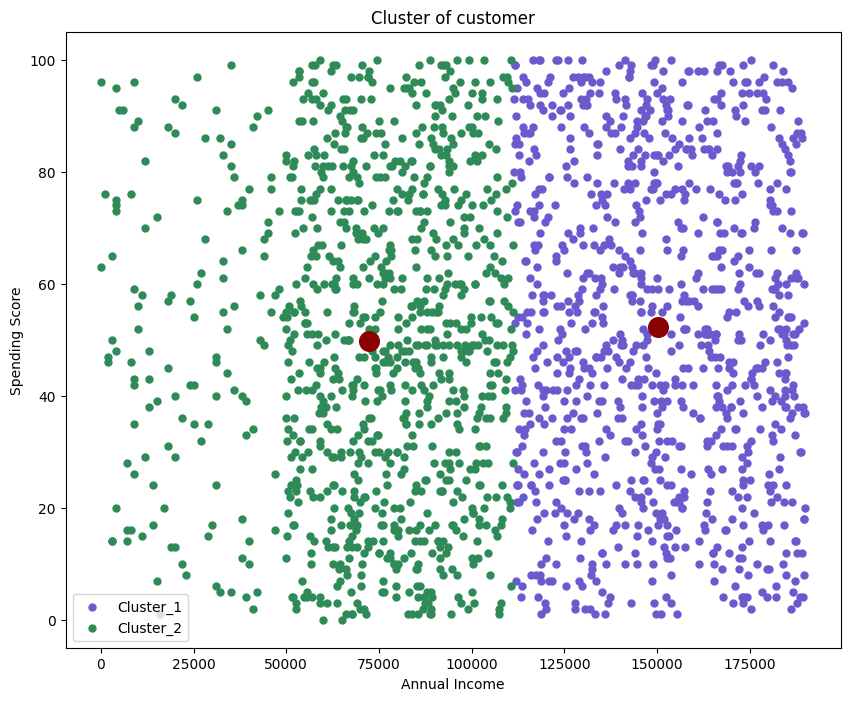

In [107]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 25, c='slateblue', label= "Cluster_1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 25, c='seagreen', label= "Cluster_2")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 200, c='darkred')

plt.title("Cluster of customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

<h3>When K = 3 :

In [108]:
kmeans = KMeans(n_clusters= 3, init= 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 1, ..., 1, 0, 1], dtype=int32)

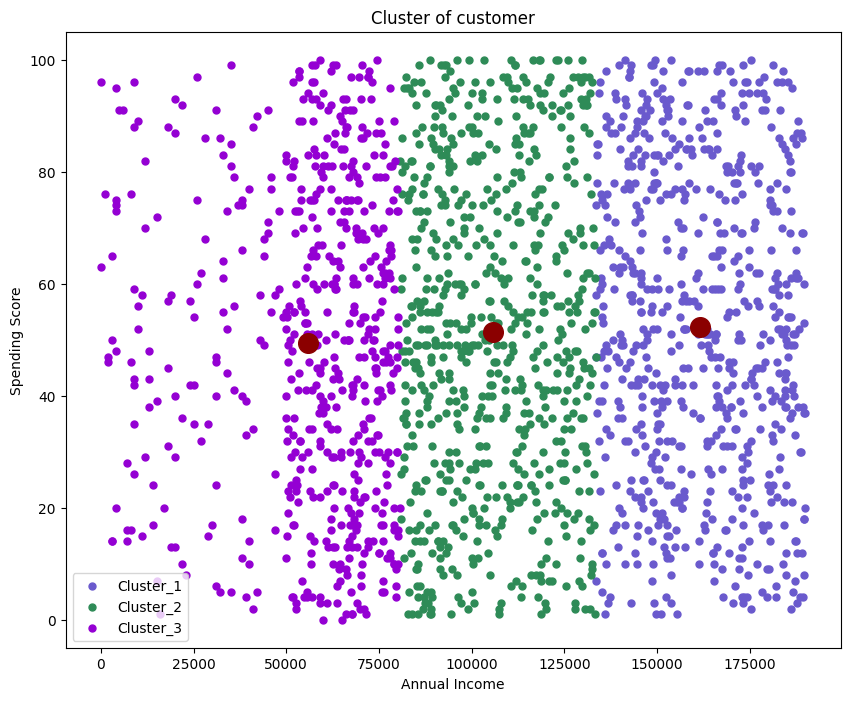

In [109]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 25, c='slateblue', label= "Cluster_1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 25, c='seagreen', label= "Cluster_2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 25, c='darkviolet', label= "Cluster_3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 200, c='darkred')

plt.title("Cluster of customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

<h3>When K = 6 :

In [120]:
kmeans = KMeans(n_clusters= 6, init= 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 2, 1, ..., 1, 0, 5], dtype=int32)

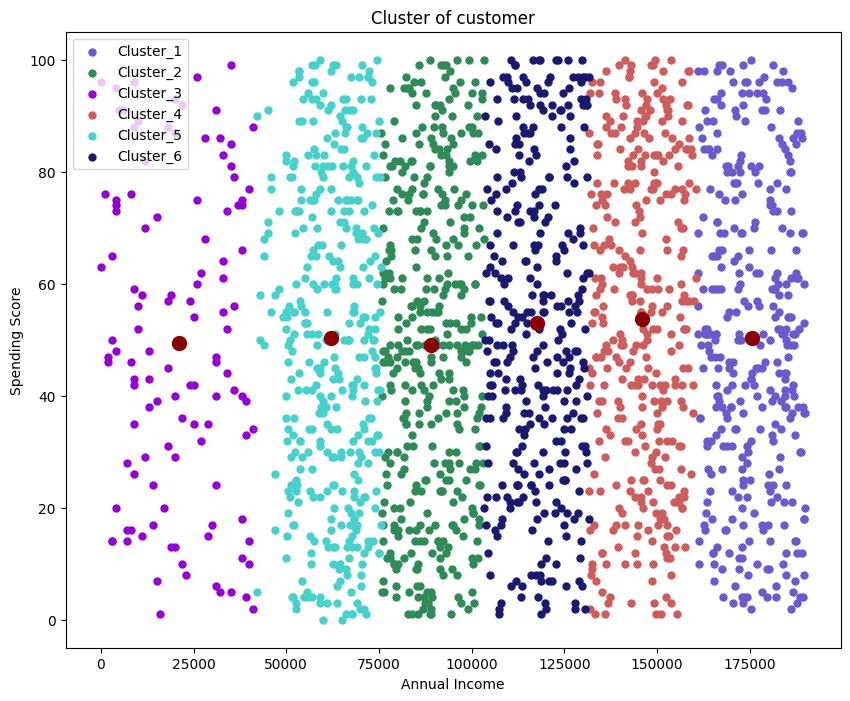

In [122]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s= 25, c='slateblue', label= "Cluster_1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s= 25, c='seagreen', label= "Cluster_2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s= 25, c='darkviolet', label= "Cluster_3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s= 25, c='indianred', label= "Cluster_4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s= 25, c='mediumturquoise', label= "Cluster_5")
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s= 25, c='midnightblue', label= "Cluster_6")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='darkred')

plt.title("Cluster of customer")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

<h2> Now we will use 'df' to fit KMeans

In [112]:
wcss = []
silhouette_scores = []

for i in range(2,11):
  kmean = KMeans(n_clusters= i, init= "k-means++", random_state= 42)
  kmean.fit(df)
  wcss.append(kmean.inertia_)
  silhouette_scores.append(silhouette_score(df, kmean.labels_))

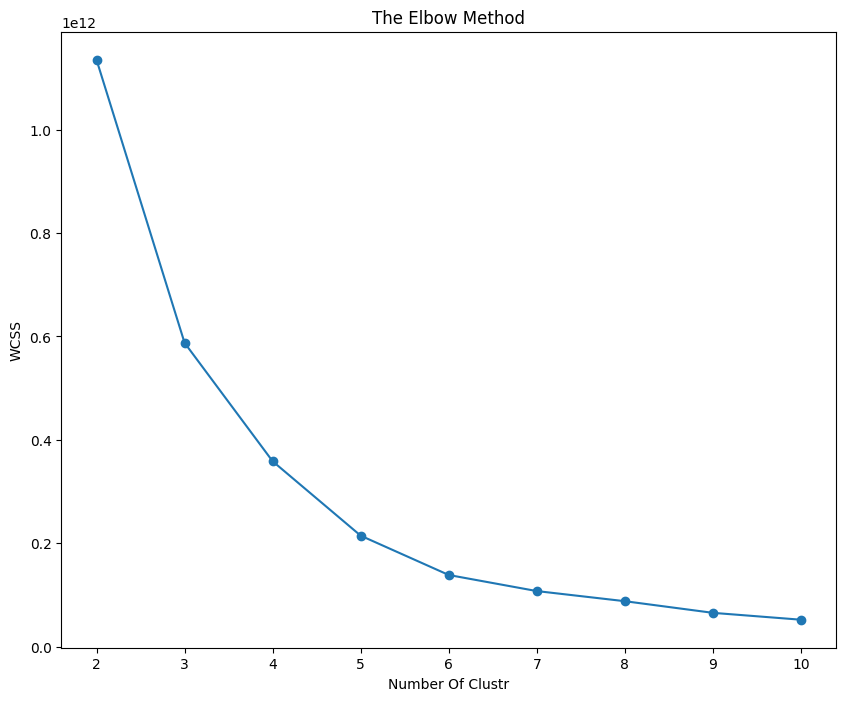

******************************
******************************
Number Of Clusters: 2, Silhouette Score: 0.62
Number Of Clusters: 3, Silhouette Score: 0.56
Number Of Clusters: 4, Silhouette Score: 0.53
Number Of Clusters: 5, Silhouette Score: 0.56
Number Of Clusters: 6, Silhouette Score: 0.57
Number Of Clusters: 7, Silhouette Score: 0.55
Number Of Clusters: 8, Silhouette Score: 0.55
Number Of Clusters: 9, Silhouette Score: 0.55
Number Of Clusters: 10, Silhouette Score: 0.55
******************************
******************************


In [113]:
plt.figure(figsize=(10, 8))
plt.plot(range(2,11), wcss, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number Of Clustr")
plt.ylabel("WCSS")
plt.show()

print('*' * 30)
print('*' * 30)


for k in range(len(silhouette_scores)):
  print(f"Number Of Clusters: {k+2}, Silhouette Score: {silhouette_scores[k]:.2f}")

print('*' * 30)
print('*' * 30)

In [114]:
kmeans_best = KMeans(n_clusters=best_cluster, random_state=0)
kmeans_best.fit(df)

KMeans(n_clusters=2, random_state=0)

In [115]:
# Add the cluster labels to the dataframe
df['Cluster'] = kmeans_best.labels_
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster
0,1,1,19,15000,39,5,1,4,0
1,2,1,21,35000,81,2,3,3,0
2,3,0,20,86000,6,2,1,1,0
3,4,0,23,59000,77,7,0,2,0
4,5,0,31,38000,40,3,2,6,0
...,...,...,...,...,...,...,...,...,...
1995,1996,0,71,184387,40,0,8,7,1
1996,1997,0,91,73158,32,1,7,7,0
1997,1998,1,87,90961,14,5,9,2,0
1998,1999,1,77,182109,4,4,7,2,1


<h3>Clustering Results Visualization<br>
<h4>
After the clustering model is trained and the optimal number of clusters is determined, the next step is to display the clustering results through visualization. Below is a visualization of the clustering results using a scatter plot.

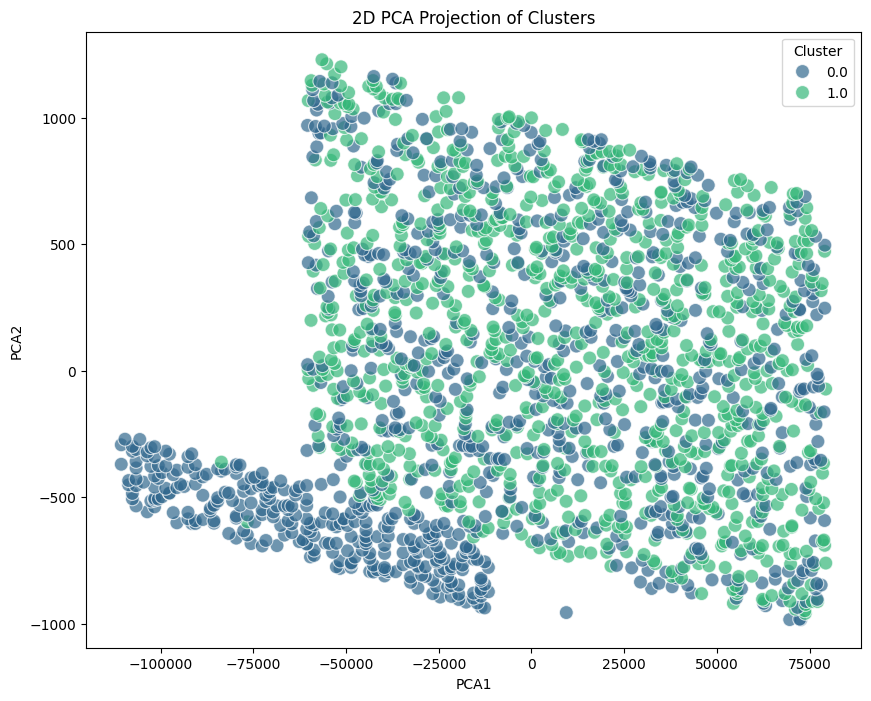

In [116]:
# Reduce the dimensionality of the data to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the PCA results and the cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('2D PCA Projection of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

<h2>7. Cluster Analysis and Interpretation :

In [117]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0         851.902708  0.413240  48.661986       72173.180542   
1        1153.163223  0.399793  49.134298      150210.535124   

         Spending Score (1-100)  Profession  Work Experience  Family Size  
Cluster                                                                    
0                     49.785356    2.751254         3.794383     3.578736  
1                     52.411157    2.912190         4.399793     3.941116  


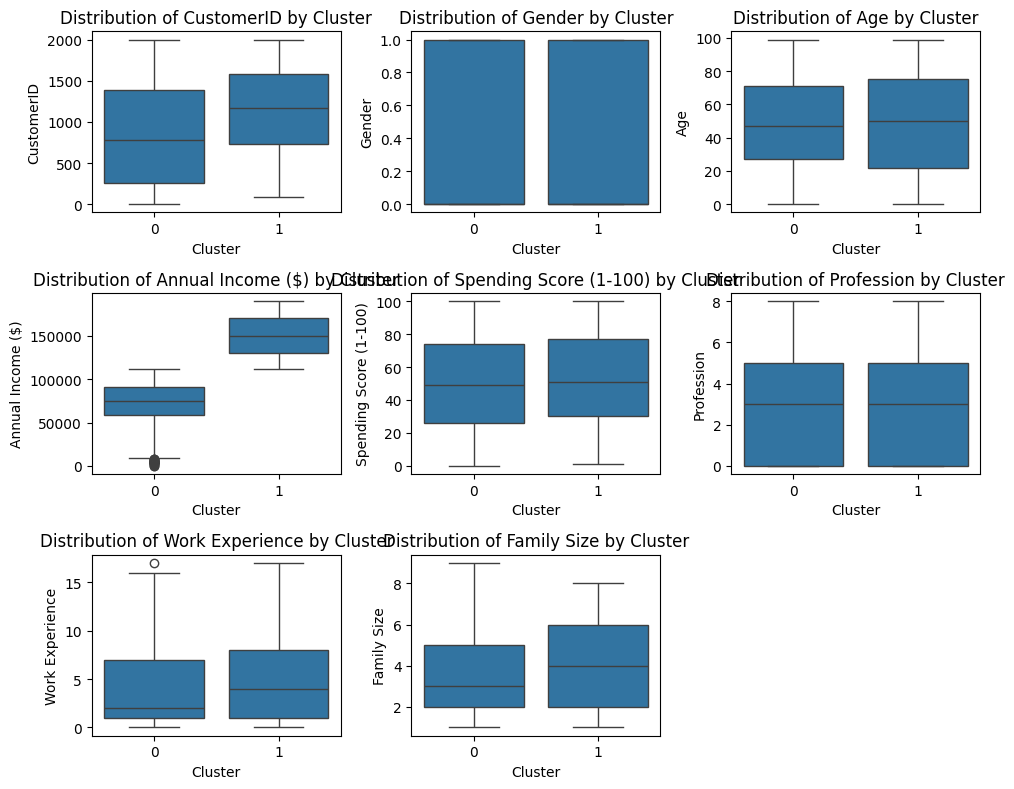

In [118]:
plt.figure(figsize=(10, 8))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.tight_layout()

plt.show()



<h3>
Here is the analysis and interpretation of the clustering results based on the characteristics of each cluster.

Cluster 0:

* Age: The average age in Cluster 0 is 48 years.

* Income: The average income in Cluster 0 is $72,173.

* Spending Score: The average spending score in Cluster 0 is 49.

* Interpretation: Cluster 0 consists of customers with middle age, middle income, and moderate spending scores.

Cluster 1:

* Age: The average age in Cluster 1 is 49 years.

* Income: The average income in Cluster 1 is $150,210.

* Spending Score: The average spending score in Cluster 1 is 52.

* Interpretation: Cluster 1 consists of customers with middle age, high income, and moderate spending scores.

From the analysis and interpretation of each cluster, we can see the characteristics of each cluster. Thus, store owners can understand the customer profiles in each cluster and adjust the appropriate marketing strategies.




<h1>5. Export to CSV file

In [119]:
df.to_csv('Clustered_Customers.csv', index=False)